# Linear Regression with Python

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

"""

In [4]:
# Importing Libraries EDA Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Encoding 
# Label will provide numberical value for categorical feature
# One hot coder will create different columns
# We can use pd.get_dummpy('feature name', drop_frist =True)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
Encode = LabelEncoder()

# Libraries for Standardization
from sklearn.preprocessing import StandardScaler,MinMaxScaler
Sc = StandardScaler()
Mnmx_Sc= MinMaxScaler()

# linear regression Libraries
# To calculate multicollinearity and VIF 
import statsmodels.api as sm
from scipy import stats
from scipy.stats import mode

# for model building
# train test split
from  sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  GridSearchCV,KFold,StratifiedKFold

# Linear model Libraries and Evaluation 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score,roc_auc_score,roc_curve
from sklearn import metrics
# for polynomial featrues and other regressors

from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# PCA
from sklearn.decomposition import PCA

In [5]:
# Importing the Data
USAhousing = pd.read_csv('USA_Housing.csv')

In [6]:
USAhousing.info() # 5000 All are non null objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [7]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


# Visualization

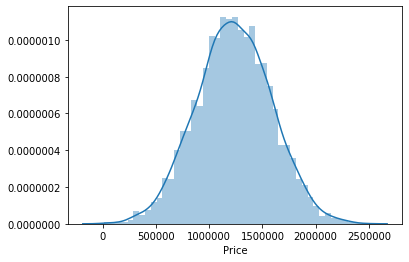

In [9]:

sns.distplot(USAhousing['Price']) # Its nomally distributed which is quite good.

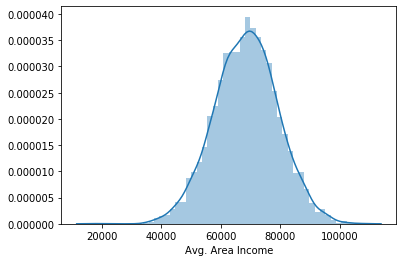

In [10]:
sns.distplot(USAhousing['Avg. Area Income']) # also normally distributed

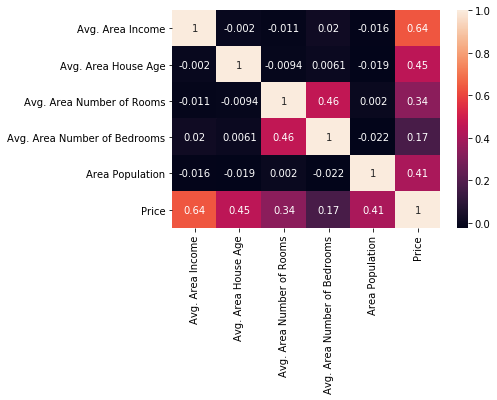

In [11]:
sns.heatmap(USAhousing.corr(),annot=True) # To check the correlation between the input variables 
# most of the features are not correlated except number of rooms and Area of rooms which shows they are dependent 0.46
# Now its our responsibility to check whether to consider both or only one is enough we will check multicolinearity to check this


In [12]:
# Deleting Address from input varibales
USAhousing.drop(['Address'],axis = 1, inplace= True)


In [13]:
## We will standardize the variables as they differ a lot from each other.
scaler = StandardScaler()
scaler.fit(USAhousing.drop('Price',axis=1))
scaled_features = scaler.transform(USAhousing.drop('Price',axis=1))
df=pd.DataFrame(scaled_features,columns=USAhousing.columns[:-1])
feat_names = df.columns
y= USAhousing['Price']

# Steps to calculate VIF
1. To calculate we have to build model with features itself
2. calculate VIF for each model
"""


In [14]:
for i in range(0,len(feat_names)):
    yy = df.loc[:, df.columns == feat_names[i]]
    xx = df.loc[:, df.columns != feat_names[i]]
    model = sm.OLS(yy, xx)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            feat_names[i], (round(rsq, 2))
        ))
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            feat_names[i], vif)
    )


R Square value of Avg. Area Income column is 0.0 keeping all other columns as features
Variance Inflation Factor of Avg. Area Income column is 1.0 

R Square value of Avg. Area House Age column is 0.0 keeping all other columns as features
Variance Inflation Factor of Avg. Area House Age column is 1.0 

R Square value of Avg. Area Number of Rooms column is 0.21 keeping all other columns as features
Variance Inflation Factor of Avg. Area Number of Rooms column is 1.27 

R Square value of Avg. Area Number of Bedrooms column is 0.22 keeping all other columns as features
Variance Inflation Factor of Avg. Area Number of Bedrooms column is 1.27 

R Square value of Area Population column is 0.0 keeping all other columns as features
Variance Inflation Factor of Area Population column is 1.0 



#### VIF Results are  well below 10.
Multicolinearity does not exist.
Now we will the model. and also will evaluate at same time.
"""

In [15]:
## Split the data into train and test set:

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=101)

In [17]:
# Linear Regressor
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
linpred = lin_reg.predict(x_test)

In [18]:
print(r2_score(y_test, linpred))  # 0.9170626478020514
# Model fits 91% to the model which is really cool.

0.9170626478020514


In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, linpred))
print('MSE:', metrics.mean_squared_error(y_test,linpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, linpred)))

#MAE: 81877.46809001947
#MSE: 10364756049.538454
#RMSE: 101807.44594349891


MAE: 81877.46809001947
MSE: 10364756049.538454
RMSE: 101807.44594349891


In [21]:
## We will use K-Fold Cross Validation to see if model performance improves
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = lin_reg, X = x_train, y = y_train, cv = 10)
accuracies.mean() #0.9174576892583373
accuracies.std() # 0.006892734930518825


0.006892734930518825

In [22]:
## Lasso Linear Regression
lin_reg_lasso = linear_model.LassoLars(alpha=0.03,max_iter=101)
lin_reg_lasso.fit(x_train, y_train)
linpredlaso = lin_reg_lasso.predict(x_test)
print(r2_score(y_test, linpredlaso)) # 0.917062794541475

0.917062794541475


In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, linpredlaso))
print('MSE:', metrics.mean_squared_error(y_test,linpredlaso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, linpredlaso)))

#MAE: 81877.36731721555
#MSE: 10364737711.379728
#RMSE: 101807.35588050466


MAE: 81877.36731721555
MSE: 10364737711.379728
RMSE: 101807.35588050466


Text(0, 0.5, 'Predicted Y')

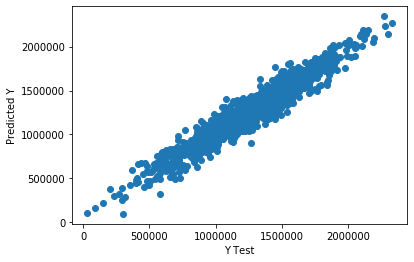

In [24]:
# Visualization of Prediction
plt.scatter(y_test,linpredlaso)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [25]:
## We will use K-Fold Cross Validation to see if model performance improves
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = lin_reg_lasso, X = x_train, y = y_train, cv = 10)
accuracies.mean() #.9174
accuracies.std() #0.006892565388981955

0.006892565388981955

# To Increase Efficiancy of Model we will use Backward Elimination.
# Back Elemination method
In this we have to add one column which consitute of constant values.
Y= b0+b1x1+b2x2+b3x3.
to run it properly that to take b0 also in account.
we will associate x0 (ones array)to b0.
(Actually this stats model does not take constant into account.other models in python library do consist of constant by default.)

Steps:
1. Significance Level: 0.05
2. Fit full model with all features
3. consider predictor with highest p value. if pvalue>SL drop column.
"""


In [26]:
# for backward elimination we need to add ones in begining
xb=np.append(arr=np.ones((len(df),1)).astype(int),values=df,axis=1)
xb=pd.DataFrame(xb, columns=['Constant','Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'])


In [27]:
yb=y

# We will create new X that is optimal for our model 
x_opt= xb
regr_ols=sm.OLS(endog=yb,exog=x_opt).fit()

# Getting P-values
regr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:48:03   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Constant                      1.232e+06   1430.525    861.273      0.000    1.23e+06    1.23e+06
Avg. Area Income                2.3e+05   1431.354    160.656      0.000    2.27e+05    2.33e+05
Avg. Area House Age           1.642e+05   1430.938    114.754      0.000    1.61e+05    1.67e+05
Avg. Area Number of Rooms     1.214e+05   1614.362     75.170      0.000    1.18e+05    1.25e+05
Avg. Area Number of Bedrooms  2037.5285   1614.918      1.262      0.207   -1128.421    5203.478
Area Population               1.509e+05   1431.430    105.393      0.000    1.48e+05    1.54e+05
==============================================================================
Omnibus:                        5.580   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.959
Skew:                           0.011   Prob(JB):                       0.0838
Kurtosis:                       2.847   Cond. No.                         1.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 **We are interested in calculating p values 
 Area number of Bedrooms has p value as .207
 which is higher than SL .05
 we will remove this column**

In [28]:
x_opt= xb[['Constant','Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
regr_ols=sm.OLS(endog=yb,exog=x_opt).fit()
# Getting P-values
regr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.398e+04
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:48:53   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4995   BIC:                         1.295e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Constant                   1.232e+06   1430.610    861.222      0.000    1.23e+06    1.23e+06
Avg. Area Income             2.3e+05   1430.889    160.743      0.000    2.27e+05    2.33e+05
Avg. Area House Age        1.642e+05   1430.929    114.769      0.000    1.61e+05    1.67e+05
Avg. Area Number of Rooms  1.223e+05   1430.763     85.476      0.000    1.19e+05    1.25e+05
Area Population            1.508e+05   1431.053    105.388      0.000    1.48e+05    1.54e+05
==============================================================================
Omnibus:                        5.310   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                4.742
Skew:                           0.011   Prob(JB):                       0.0934
Kurtosis:                       2.851   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**All p values are now below SL
We will build our model once again to see improvement.**

In [29]:
ndf = df.drop('Avg. Area Number of Bedrooms',axis=1)
ndf.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,1.028660,-0.296927,0.021274,-1.317599
1,1.000808,0.025902,-0.255506,0.403999
2,-0.684629,-0.112303,1.516243,0.072410
3,-0.491499,1.221572,-1.393077,-0.186734
4,-0.807073,-0.944834,0.846742,-0.988387


In [30]:
# Building actual model 
# We will split the data in training and testing set
from sklearn.model_selection import train_test_split
xn_train, xn_test, yn_train, yn_test = train_test_split(ndf, yb, test_size=0.3, random_state=101)
lm = LinearRegression()
lm.fit(xn_train,yn_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print(lm.intercept_)

1232978.9530919113


In [32]:
print(lm.coef_)

[230387.98875412 163840.54855737 122855.74540818 151057.16603559]


In [33]:
# Final Prediction
New_predictions = lm.predict(xn_test)

In [34]:
# Model Evaluation
r2_score(yn_test, New_predictions) # 0.9184635249088322

0.9184635249088322

In [35]:
print('MAE:', metrics.mean_absolute_error(yn_test, New_predictions))
print('MSE:', metrics.mean_squared_error(yn_test,New_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yn_test, New_predictions)))

#MAE: 81268.89606138438
#MSE: 10174437569.110403
#RMSE: 100868.41710421753

MAE: 81268.89606138438
MSE: 10174437569.110403
RMSE: 100868.41710421753


Text(0, 0.5, 'Predicted Y')

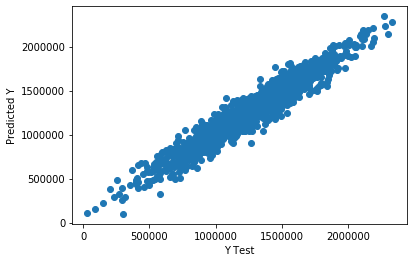

In [36]:
# Visualization of Prediction
plt.scatter(yn_test,New_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

"""
Let's Introduce PCA to see the chnages in results
"""

# PCA

In [37]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(df)
explained_variance = pca.explained_variance_ratio_

In [39]:
print(explained_variance)
# from We atleast have to take three components in order to explain the correlatin of dataset above 0.6 is good

[0.29264726 0.20502271 0.20041714 0.19481882 0.10709407]


In [40]:
npca = PCA(n_components=3)
x_pca = npca.fit_transform(df)

X_pca_train,X_pca_test,Y_pca_Train,y_pca_test =train_test_split(x_pca,y, test_size=0.25,random_state=101)


In [41]:
# Linear Regressor
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_pca_train, Y_pca_Train)
linpred_pca = lin_reg_pca.predict(X_pca_test)

In [42]:
print(r2_score(y_pca_test, linpred_pca))  # 0.17729360983940834

0.17729360983940734


In [43]:
print('MAE:', metrics.mean_absolute_error(y_pca_test, linpred_pca))
print('MSE:', metrics.mean_squared_error(y_pca_test,linpred_pca))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pca_test, linpred_pca)))

#MAE: 251888.927006357
#MSE: 102814362991.22462
#RMSE: 320646.78852473263


MAE: 251888.92700635706
MSE: 102814362991.22475
RMSE: 320646.78852473287
